In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create



# Read in the data

df = pd.read_csv(r'C:\Users\Segovia\Documents\movies.csv')

In [2]:
# Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Checking if missing data
# Looping through columns

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Filling 'NA' with '0'

df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

# Change type of column from 'float' to 'int' for "budget" and "gross"

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [ ]:
df

In [6]:
# Converting type of "released" column from 'object' to 'string'
df['released'] = df['released'].astype('str')

In [7]:
# Splitting the column "released" in two different columns: "Released date" and "Released Location"

df[['Released Date', 'Release Location']] = df['released'].str.split('(', expand=True)

In [8]:
# Erasing the second parenthesis

df[['Release Location']] = df['Release Location'].str.replace(")"," ",regex = False)

In [9]:
# Converting "Released Date" from MM-DD-YYYY to YYYY-MM-DD 

df['Released Date'] = pd.to_datetime(df['Released Date'])

In [10]:
# Erasing the columns "released" and "Released date"

df = df.drop(['released'], axis=1)

In [ ]:
df

In [11]:
# Erasing the columns "released" and "Released date"

df = df.drop(['released'], axis=1)

KeyError: "['released'] not found in axis"

In [12]:
# Create correct Year column
df['Year_Correct'] = df['Released Date'].astype(str).str[:4]

In [13]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Released Date,Release Location,Year_Correct
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States,1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States,1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020-10-23,United States,2020
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020-02-07,United States,2020
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020-04-27,Cameroon,2020
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020-10-01,United States,2020


In [14]:
# Order movie dataframe by the "gross" revenue
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
pd.set_option('display.max_rows', None)

In [15]:
# Checking for duplicates and drop them

df = df.drop_duplicates()

In [16]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Released Date,Release Location,Year_Correct
5445,Avatar,PG-13,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States,2019
3045,Titanic,PG-13,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990-01-26,United States,1990
1614,Edge of Sanity,R,Horror,1989,5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989-04-14,United States,1989
1606,"I, Madman",R,Fantasy,1989,6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989-04-07,United States,1989
1601,My Twentieth Century,NaN,Comedy,1989,7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990-01-13,Japan,1990


In [17]:
# Budget high correlation
# company high correlation

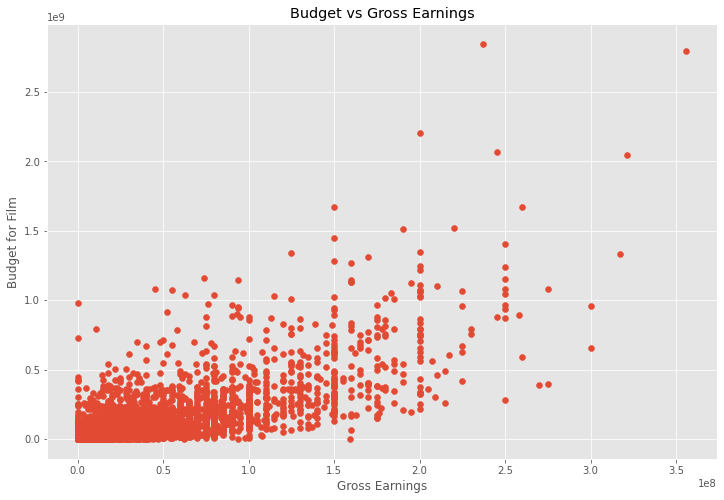

In [18]:
# Scatter plot  with "Busget" vs "gross"


plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

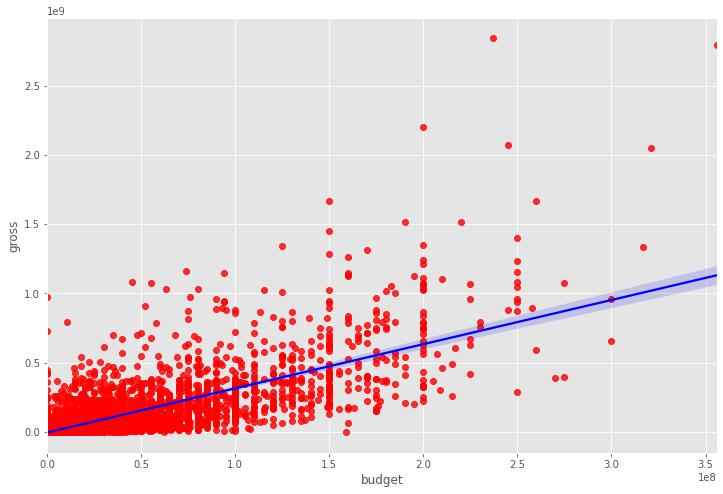

In [19]:
# Plot the budget vs Gross using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [20]:
# Start looking at correlation by checking between the three types of correlations: Pearson, Kendall and Spearman.
# Compare them and finally choosing the best for budget and gross.

df.corr() # Pearson correlation type

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [21]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [22]:
df.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.209304,0.216595,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.331465,0.300115,1.000000,0.439902,0.560118,0.198240
budget,0.209304,-0.005194,0.439902,1.000000,0.541956,0.176016
gross,0.216595,0.090626,0.560118,0.541956,1.000000,0.176912
runtime,0.097184,0.283611,0.198240,0.176016,0.176912,1.000000


In [23]:
df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.291152,0.314681,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.469829,0.428138,1.000000,0.604627,0.752265,0.290159
budget,0.291152,-0.007500,0.604627,1.000000,0.716816,0.246748
gross,0.314681,0.132569,0.752265,0.716816,1.000000,0.256783
runtime,0.142977,0.399857,0.290159,0.246748,0.256783,1.000000


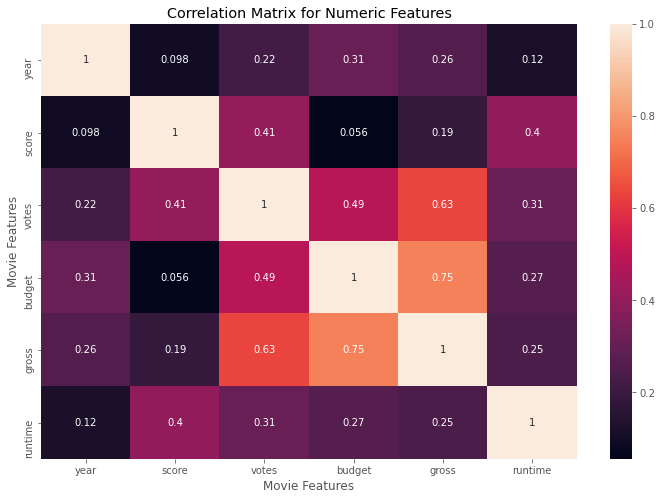

In [24]:
# Indeed, high correlation between budget and gross with Pearson method

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [25]:
# Looking at company

df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Released Date,Release Location,Year_Correct
5445,Avatar,PG-13,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States,2019
3045,Titanic,PG-13,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States,2018


In [26]:
# Associate a number to every column whithin the dataset

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Released Date,Release Location,Year_Correct
5445,533,5,0,2009,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009-12-18,56,29
7445,535,5,0,2019,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2019-04-26,56,39
3045,6896,5,6,1997,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997-12-19,56,17
6663,5144,5,0,2015,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2015-12-18,56,35
7244,536,5,0,2018,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2018-04-27,56,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,4.5,274.0,117,82,2797,55,0,0,1159,92.0,1990-01-26,56,10
1614,1745,6,10,1989,5.2,1300.0,1033,1743,166,54,0,0,146,85.0,1989-04-14,56,9
1606,2691,6,8,1989,6.0,2900.0,2743,946,1195,6,0,0,2237,89.0,1989-04-07,56,9
1601,3836,-1,4,1989,7.1,1500.0,1105,1696,681,18,0,0,504,104.0,1990-01-13,28,10


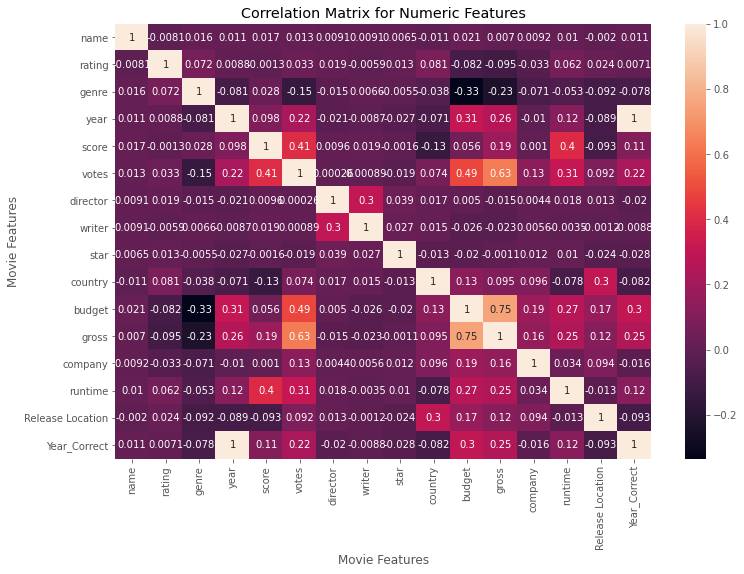

In [27]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [28]:
# Organize the correlation matrix

correlation_mat  = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name                1.000000
              rating             -0.008069
              genre               0.016355
              year                0.011453
              score               0.017097
                                    ...   
Year_Correct  gross               0.254686
              company            -0.016109
              runtime             0.120636
              Release Location   -0.093351
              Year_Correct        1.000000
Length: 256, dtype: float64

In [29]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre             budget             -0.334021
budget            genre              -0.334021
genre             gross              -0.234297
gross             genre              -0.234297
votes             genre              -0.145307
                                        ...   
year              year                1.000000
genre             genre               1.000000
rating            rating              1.000000
Release Location  Release Location    1.000000
Year_Correct      Year_Correct        1.000000
Length: 256, dtype: float64

In [30]:
high_corr = sorted_pairs[(sorted_pairs > 0.5)]

high_corr

votes             gross               0.632834
gross             votes               0.632834
                  budget              0.750157
budget            gross               0.750157
Year_Correct      year                0.997295
year              Year_Correct        0.997295
name              name                1.000000
runtime           runtime             1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
country           country             1.000000
star              star                1.000000
writer            writer              1.000000
director          director            1.000000
votes             votes               1.000000
score             score               1.000000
year              year                1.000000
genre             genre               1.000000
rating            rating              1.000000
Release Location  Release Location    1.000000
Year_Correct 

In [ ]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation